In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]
ea_to_debye = 1/0.393430307

In [30]:
n_1, l_1, m_1 = 70, 69, 69
n_2, l_2, m_2 = 71, 70, 70
transition_dipole_moment = np.abs(
    stark_int(n_1, n_2, l_1, l_2, m_1, m_2, field_orientation='parallel')) * e*a_0 # in atomic units e a_0
print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
print('Transition dipole moment: ', transition_dipole_moment*ea_to_debye/(e*a_0), ' Debye')

Transition dipole moment:  3476.95686325  (a.u.)
Transition dipole moment:  8837.54200271  Debye


In [27]:
n_1, l_1, m_1 = 72, 0, 0
n_2, l_2, m_2 = 71, 1, 0
print(rad_overlap(n_1, n_2, l_1, l_2, p=1.0))
print(ang_overlap(l_1, l_2, m_1, m_2, 'parallel', [-1,0,+1]))

1630.3029660951327
0.5773502691896257


In [15]:
n_1, l_1, m_1 = 1, 0, 0
n_2, l_2, m_2 = 2, 1, 1
print(rad_overlap(n_1, n_2, l_1, l_2, p=1.0))
print(ang_overlap(l_1, l_2, m_1, m_2, 'parallel', [-1,0,+1]))

1.540657976472083
-0.5773502691896257


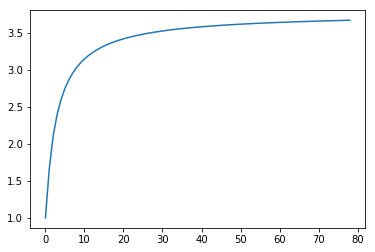

In [25]:
tdm_cc = []
tdm_sp = []
for i in np.arange(1,80):
    n_1 = i
    l_1, m_1 = n_1-1, n_1-1
    n_2 = n_1+1
    l_2, m_2 = n_2-1, n_2-1
    
    transition_dipole_moment = np.abs(
        stark_int(n_1, n_2, l_1, l_2, m_1, m_2, field_orientation='parallel')) * e*a_0 # in atomic units e a_0
    #print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
    tdm_cc.append(transition_dipole_moment/(e*a_0))

    n_1 = i
    l_1, m_1 = 0, 0
    n_2 = n_1+1
    l_2, m_2 = 1, 0
    
    transition_dipole_moment = np.abs(
        stark_int(n_1, n_2, l_1, l_2, m_1, m_2, field_orientation='parallel')) * e*a_0 # in atomic units e a_0
    #print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
    tdm_sp.append(transition_dipole_moment/(e*a_0))
    
plt.plot(np.array(tdm_cc)/np.array(tdm_sp))
#plt.plot(tdm_sp)